# Sentiment Analysis - IMDB
In this  code example we demonstrate the use of a RNN on a Natural Language Processing (NLP) task, namely Sentiment Analysis. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Data

In [2]:
# We keep the 10 000 most frequent words, the rest are represented as "oov_char" values.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# Limit the dataset so training goes faster for demonstration purposes (try using the full dataset)
limit = 12500
x_train = x_train[:limit]
y_train = y_train[:limit]
x_test = x_test[:limit]
y_test = y_test[:limit]

print(x_train.shape)
print(y_train.shape)

17464789/17464789 [==============================] - 1s 0us/step
(12500,)
(12500,)


In [3]:
# Each word is represented using an integer corresponding to the location of that word in the 10 000-word dictionary
print(x_train[0][:12])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468]


In [4]:
# Printing out actual text instead of numbers
word_index = imdb.get_word_index()

def decode_review(text, word_index):
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in text])
    return decoded_review

print(decode_review(x_train[0][:12], word_index))

1641221/1641221 [==============================] - 0s 0us/step
? this film was just brilliant casting location scenery story direction everyone's


In [6]:
# Calculating the lengths of the documents (word count), 91% of the documents have fewer than 500 words
wc = np.array([len(x) for x in x_train])
print(np.median(wc))
print(np.mean(wc <= 500))

178.0
0.91536


In [7]:
# Padding
maxlen = 500
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
print(np.shape(x_train))
print(np.shape(x_test))

(12500, 500)
(12500, 500)


# Model

In [8]:
# In the model we use an embedding layer that is learned during training. 
model = keras.models.Sequential()
model.add(keras.layers.Embedding(input_dim=10000, output_dim=32))
model.add(keras.layers.LSTM(units=32))
model.add(keras.layers.Dense(units=1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_data=(x_test, y_test))

Epoch 1/5
98/98 [==============================] - 29s 278ms/step - loss: 0.6611 - accuracy: 0.6005 - val_loss: 0.5889 - val_accuracy: 0.6822
Epoch 2/5
98/98 [==============================] - 27s 278ms/step - loss: 0.4560 - accuracy: 0.8060 - val_loss: 0.3996 - val_accuracy: 0.8387
Epoch 3/5
98/98 [==============================] - 32s 327ms/step - loss: 0.3276 - accuracy: 0.8690 - val_loss: 0.3407 - val_accuracy: 0.8547
Epoch 4/5
98/98 [==============================] - 33s 335ms/step - loss: 0.2627 - accuracy: 0.8993 - val_loss: 0.4349 - val_accuracy: 0.8148
Epoch 5/5
98/98 [==============================] - 32s 326ms/step - loss: 0.2209 - accuracy: 0.9190 - val_loss: 0.3540 - val_accuracy: 0.8531


# Evaluating the model

In [9]:
predictions = (model.predict(x_test) > 0.5).astype(int)

391/391 [==============================] - 17s 42ms/step


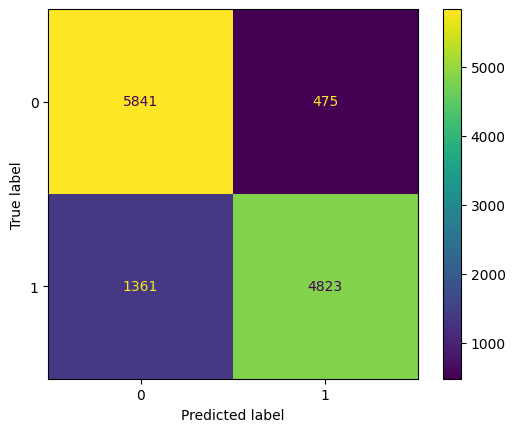

In [10]:
result = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(result)
disp.plot()